In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
# Load the dataset
file_path = 'records.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,id,value,record_type_id,activity_target_id,record_type.name,record_type.form_type,record_type.options,record_type.activity_type_id,activity_type.name,activity_type.activity_type_group_id,...,customer.phone,customer.population,customer.room,customer.doctor,customer.birthdate,customer.start_date,customer.care_level,customer.meal_type,customer.sex,customer.left_at
0,66553,Happy,1498,40275,I-emotion,4,"[[""Sad"",false,""""],[""Happy"",false,""""],[""Normal""...",200,I - Walking,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66554,36,1496,40275,I-temperature,0,[],200,I - Walking,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66555,45,1497,40275,I-weight,0,[],200,I - Walking,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,66556,Normal,1498,40276,I-emotion,4,"[[""Sad"",false,""""],[""Happy"",false,""""],[""Normal""...",200,I - Walking,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66558,35.5,1496,40278,I-temperature,0,[],200,I - Walking,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

id                                       0
value                                   20
record_type_id                           0
activity_target_id                       0
record_type.name                         0
record_type.form_type                    0
record_type.options                      0
record_type.activity_type_id             0
activity_type.name                       0
activity_type.activity_type_group_id     0
activity_type.has_multi_records          0
activity_type.has_target                 0
activity_type.is_instant                57
activity_type_group.name                 0
activity_target.activity_id              0
activity_target.customer_id             57
activity_target.user_id                  0
activity.started_at                      4
activity.finished_at                     6
activity.user_id                         0
activity.activity_type_id                0
activity.local_id                        0
customer.name                           57
customer.em

In [5]:
# Hapus kolom yang semua isinya berisi NaN
df_cleaned = df.dropna(axis=1, how='all')

In [6]:
# Mendapatkan nilai-nilai unik dari kolom 'record_type.name'
unique_record_types = df_cleaned['record_type.name'].unique()
unique_record_types

array(['I-emotion', 'I-temperature', 'I-weight', 'I-diagnosis'],
      dtype=object)

In [7]:
# Filter data untuk text scenario
text_df = df_cleaned[df_cleaned['record_type.name'].isin(['I-temperature', 'I-weight', 'I-diagnosis'])]

### Temperature Report

In [8]:
# Fungsi untuk membersihkan dan mengkonversi nilai
def clean_and_convert(value):
    try:
        return float(value)
    except ValueError:
        return value

In [9]:
# Fungsi untuk memberikan diagnosis berdasarkan nilai dan tipe catatan
def diagnose_temperature(row):
    value = clean_and_convert(row['value'])
    
    if isinstance(value, float):
        if value > 37.5:
            return 'High temperature'
        elif value < 36.0:
            return 'Low temperature'
        else:
            return 'Normal temperature'
    else:
        return 'Invalid temperature value'

In [10]:
# Filter data untuk I-temperature
temperature_df = df_cleaned[df_cleaned['record_type.name'] == 'I-temperature'].copy()


In [11]:
# Terapkan fungsi diagnosis ke setiap baris
temperature_df['diagnosis'] = temperature_df.apply(diagnose_temperature, axis=1)

In [12]:
# Hitung jumlah setiap diagnosis
diagnosis_counts = temperature_df['diagnosis'].value_counts()

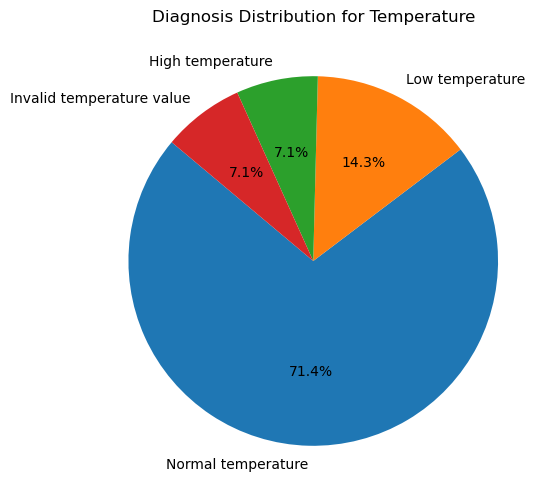

In [13]:
# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagnosis Distribution for Temperature')
plt.show()

### Weight Report

In [14]:
# Filter data untuk I-weight
weight_df = df_cleaned[df_cleaned['record_type.name'] == 'I-weight'].copy()

In [15]:
# Fungsi untuk memberikan diagnosis berdasarkan nilai dan tipe catatan
def diagnose_weight(row):
    value = clean_and_convert(row['value'])

    if isinstance(value, float):
        if value > 80:
            return 'Overweight'
        elif value < 50:
                return 'Underweight'
        else:
                return 'Normal weight'
    else:
            return 'Invalid weight value'
    
        

In [16]:
# Terapkan fungsi diagnosis ke setiap baris
weight_df['diagnosis'] = weight_df.apply(diagnose_weight, axis=1)

In [17]:
# Hitung jumlah setiap diagnosis
diagnosis_counts = weight_df['diagnosis'].value_counts()


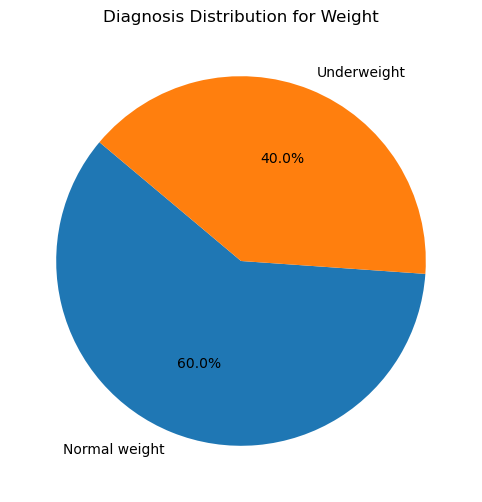

In [18]:
# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagnosis Distribution for Weight')
plt.show()

### Diagnose Report

In [26]:
# Filter data untuk I-diagnose
diagnose_df = df_cleaned[df_cleaned['record_type.name'] == 'I-diagnosis'].copy()

In [33]:
# Menghapus baris dengan nilai NaN pada kolom 'value'
diagnose_df.dropna(subset=['value'], inplace=True)

In [34]:
# Fungsi untuk mengklasifikasi diagnosis
def diagnosis_text(text):
    tokens = word_tokenize(text.lower())  # Tokenisasi dan konversi ke huruf kecil
    stop_words = set(stopwords.words('english'))  # Daftar kata-kata stop bahasa Inggris
    filtered_tokens = [w for w in tokens if not w in stop_words]  # Hapus stop words
            
    # Kata kunci yang menunjukkan akut
    acute_keywords = ['acute', 'severe', 'urgent', 'critical', 'intense']
            
    # Periksa apakah ada kata kunci akut dalam teks
    if any(keyword in filtered_tokens for keyword in acute_keywords):
        return 'Acute'
    else:
        return 'Not acute'

In [35]:
# Terapkan fungsi diagnosis ke setiap baris
diagnose_df['diagnosis'] = diagnose_df['value'].apply(diagnosis_text)

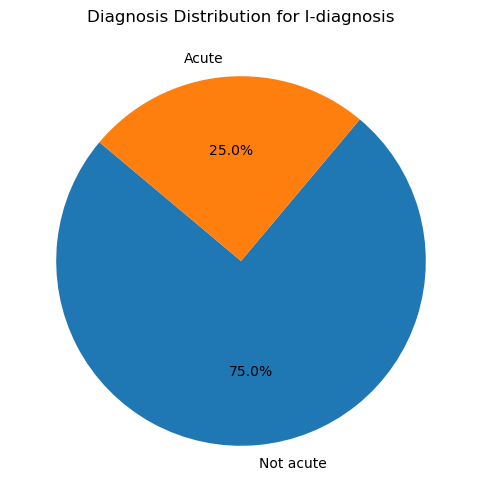

In [36]:
# Buat pie chart untuk I-diagnosis
diagnosis_counts = diagnose_df['diagnosis'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagnosis Distribution for I-diagnosis')
plt.show()